In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
x_values = pd.DataFrame(iris.data,columns=iris.feature_names)
y_values = pd.DataFrame(iris.target,columns=['target'])
irisDataFrame = pd.concat([x_values, y_values], axis=1)

## Funcao de geração de grafico matriz de correlacao

In [2]:
def graphic_matrix_correlation(pandas_dataframe, 
                               image_filename, 
                               titulo_do_grafico='',
                               type_correlation='pearson',
                               cor = 'RedYellowGreen',
                               destacar='',
                               valor=''):
    #Types of correlation :pearson, kendall, spearman
    #colors : RedYellowGreen , RedBlue
    # destacar: maior, menor, igual
    # valor: qualquer valor float
    
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np
    if cor=='RedBlue':
        mapa_cor='RdBu'
    if cor=='RedYellowGreen':
        mapa_cor='RdYlGn'
        
    if (destacar=='maior' and valor<>''):
        corr_dataframe=pandas_dataframe.corr(type_correlation)>valor
    elif(destacar=='menor' and valor<>''):
        corr_dataframe=pandas_dataframe.corr(type_correlation)<valor
    elif(destacar=='igual' and valor<>''):
        corr_dataframe=pandas_dataframe.corr(type_correlation)==valor
    else:
        corr_dataframe=pandas_dataframe.corr(type_correlation)
        
       
    lista_colunas = corr_dataframe.columns.tolist()
    valores = corr_dataframe.values
    
    marcas_indices = np.arange(-0.5, len(lista_colunas)+0.5)
    #w, h = plt.figure.figaspect(2.)
    #fig = Figure(figsize=(w,h))
    #w, h =plt.figure.figaspect(2.0)
    #plt.figure(figsize=(7,5))
    plt.figure()
    plt.pcolor(valores, cmap=mapa_cor, vmin=-1, vmax=1)
    barra_de_cores = plt.colorbar()
    barra_de_cores.set_label('Rank de Correlacao ' +str.upper(type_correlation))
    plt.title(titulo_do_grafico)
    plt.xticks(1+marcas_indices, lista_colunas, rotation='vertical')
    plt.yticks(1+marcas_indices, lista_colunas)
    plt.savefig(image_filename)

## Usando Funcao

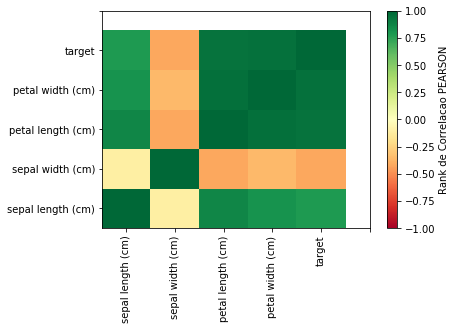

In [3]:
graphic_matrix_correlation(irisDataFrame,'grafico_correlacao.png')